In [1]:
#dependencies
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from api_keys import api_key
from citipy import citipy
from ratelimiter import RateLimiter
from datetime import datetime

In [2]:
#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]

while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 

geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

,lat,lon
0,77.230256,172.179921
1,22.577651,-99.673443
2,-57.131150,-15.980937
3,66.613638,51.174470
4,33.212463,-15.659914


In [3]:
#feeding data to citipy
city = []
country = []


for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,pevek,ru
1,ciudad del maiz,mx
2,cape town,za
3,ust-tsilma,ru
4,camacha,pt


In [4]:
weather_data=[]

In [5]:
#make API calls and collect data
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
rate_limiter = RateLimiter(max_calls=50, period=60)

for index, row in city_df.iterrows():
    with rate_limiter:
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        record_counter=1
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record #{record_counter} -- {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("----------------------------------------------------------------")
            record_counter +=1
        except:
            print (f"Weather for {city_q} not found.")
            print ("----------------------------------------------------------------")
            continue

Processing record #1 -- pevek
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pevek
----------------------------------------------------------------
Processing record #1 -- ciudad del maiz
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ciudad del maiz
----------------------------------------------------------------
Processing record #1 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cape town
----------------------------------------------------------------
Processing record #1 -- ust-tsilma
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ust-tsilma
----------------------------------------------------------------
Processing record #1 -- camacha
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=camacha
----------------------------------------------------------------
Weather for taolanaro not found.
-----

Processing record #1 -- jand
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jand
----------------------------------------------------------------
Processing record #1 -- kapaa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kapaa
----------------------------------------------------------------
Processing record #1 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Weather for palabuhanratu not found.
----------------------------------------------------------------
Processing record #1 -- codrington
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=codrington
----------------------------------------------------------------
Weather for taolanaro not found.
----------------------------------------------------------------
Processing record #1 -- nikolskoye
http://

Processing record #1 -- ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ilulissat
----------------------------------------------------------------
Processing record #1 -- alekseyevka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=alekseyevka
----------------------------------------------------------------
Processing record #1 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
----------------------------------------------------------------
Weather for attawapiskat not found.
----------------------------------------------------------------
Processing record #1 -- synya
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=synya
----------------------------------------------------------------
Processing record #1 -- xining
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=xining
------------------------

Processing record #1 -- chistoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chistoye
----------------------------------------------------------------
Processing record #1 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
----------------------------------------------------------------
Processing record #1 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #1 -- cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cabo san lucas
----------------------------------------------------------------
Weather for koungou not found.
----------------------------------------------------------------
Processing record #1 -- mount isa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mount isa
-----------

Processing record #1 -- sawakin
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sawakin
----------------------------------------------------------------
Processing record #1 -- cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cherskiy
----------------------------------------------------------------
Processing record #1 -- carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=carnarvon
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #1 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=east london
----------------------------------------------------------------
Processing record #1 -- vaini
http:/

Processing record #1 -- husavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=husavik
----------------------------------------------------------------
Processing record #1 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bluff
----------------------------------------------------------------
Processing record #1 -- castro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=castro
----------------------------------------------------------------
Processing record #1 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
----------------------------------------------------------------
Processing record #1 -- elizabeth city
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=elizabeth city
----------------------------------------------------------------
Processing record #1 -- port alfred
http://api.openweather

Processing record #1 -- beloha
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=beloha
----------------------------------------------------------------
Processing record #1 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bluff
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port elizabeth
----------------------------------------------------------------
Processing record #1 -- mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mar del plata
----------------------------------------------------------------
Processing record #1 -- luderitz
http://

Processing record #1 -- xuddur
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=xuddur
----------------------------------------------------------------
Weather for bengkulu not found.
----------------------------------------------------------------
Processing record #1 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
----------------------------------------------------------------
Processing record #1 -- nouakchott
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nouakchott
----------------------------------------------------------------
Processing record #1 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Processing record #1 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
------------------

Processing record #1 -- arroyo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=arroyo
----------------------------------------------------------------
Processing record #1 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=east london
----------------------------------------------------------------
Processing record #1 -- cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cabedelo
----------------------------------------------------------------
Processing record #1 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Weather for samusu not found.
----------------------------------------------------------------
Processing record #1 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
--------------------

Processing record #1 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #1 -- chuy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chuy
----------------------------------------------------------------
Processing record #1 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
----------------------------------------------------------------
Processing record #1 -- oranjestad
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=oranjestad
----------------------------------------------------------------
Processing record #1 -- forest
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=forest
----------------------------------------------------------------
Processing record #1 -- mbalmayo
http://api.openweathermap.org/d

Processing record #1 -- cururupu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cururupu
----------------------------------------------------------------
Processing record #1 -- dabat
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dabat
----------------------------------------------------------------
Processing record #1 -- dikson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dikson
----------------------------------------------------------------
Processing record #1 -- carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=carnarvon
----------------------------------------------------------------
Weather for ndiekro not found.
----------------------------------------------------------------
Processing record #1 -- west plains
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=west plains
---------------------

Processing record #1 -- nurota
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nurota
----------------------------------------------------------------
Processing record #1 -- hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hervey bay
----------------------------------------------------------------
Processing record #1 -- negombo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=negombo
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- san pedro
http://api.openweather

Processing record #1 -- motygino
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=motygino
----------------------------------------------------------------
Processing record #1 -- benghazi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=benghazi
----------------------------------------------------------------
Processing record #1 -- castro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=castro
----------------------------------------------------------------
Processing record #1 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bethel
----------------------------------------------------------------
Processing record #1 -- sistranda
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sistranda
----------------------------------------------------------------
Processing record #1 -- kavieng
http://api.openweatherma

Processing record #1 -- shingu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=shingu
----------------------------------------------------------------
Processing record #1 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Processing record #1 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=east london
----------------------------------------------------------------
Processing record #1 -- norheimsund
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=norheimsund
----------------------------------------------------------------
Processing record #1 -- vadso
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vadso
----------------------------------------------------------------
Processing record #1 -- naze
http://api.openweatherm

Processing record #1 -- havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=havre-saint-pierre
----------------------------------------------------------------
Processing record #1 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Processing record #1 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Weather for belushya guba not found.
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto

Processing record #1 -- nivala
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nivala
----------------------------------------------------------------
Processing record #1 -- urengoy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=urengoy
----------------------------------------------------------------
Processing record #1 -- lebu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lebu
----------------------------------------------------------------
Processing record #1 -- kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kaitangata
----------------------------------------------------------------
Processing record #1 -- hasaki
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hasaki
----------------------------------------------------------------
Processing record #1 -- mataura
http://api.openweathermap.org/da

Processing record #1 -- saint george
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint george
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- stromness
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=stromness
----------------------------------------------------------------
Processing record #1 -- olesno
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=olesno
----------------------------------------------------------------
Processing record #1 -- cave spring
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cave spring
----------------------------------------------------------------
Processing record #1 -- kangaba
http://a

In [6]:
#get count of cities with collected data
print (len(weather_data))

693


In [7]:
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Pevek,RU,69.70,39.75,100,88,7.65
1,Ciudad del Maiz,MX,22.40,65.40,96,92,1.05
2,Cape Town,ZA,-33.93,44.60,87,0,1.12
3,Ust-Tsilma,RU,65.44,43.62,98,76,3.06
4,Camacha,PT,33.08,67.23,88,20,4.70


In [8]:
weather_df.to_csv("weather_data.csv")

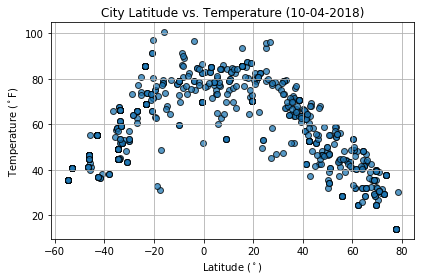

In [9]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()

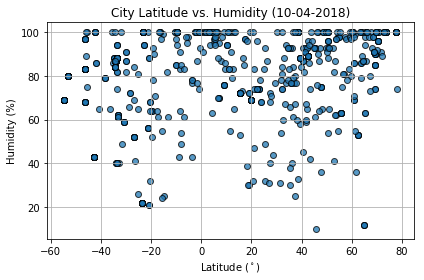

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

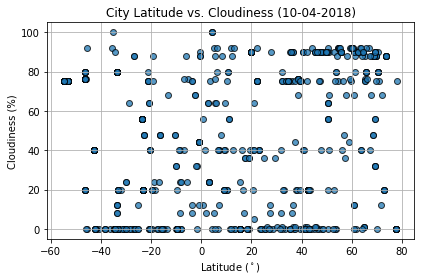

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clouds.png")
plt.show()

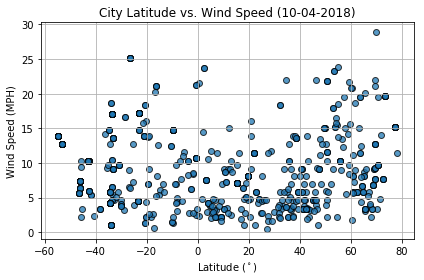

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("wind.png")
plt.show()